In [1]:
import pandas as pd
df = pd.read_csv('Carvana-dataset-small-version.csv')
df.head(3)

,IsBadBuy,VehicleAge,Make,Model,Color,Transmission,WheelType,VehOdo,Size,Vehicleprice
0,0,3,MAZDA,MAZDA3,red,AUTO,Alloy,89046,MEDIUM,7600
1,0,5,DODGE,1500 RAM PICKUP 2WD,WHITE,AUTO,Alloy,93593,LARGE TRUCK,4900
2,0,4,DODGE,STRATUS V6,MAROON,AUTO,covers,73807,MEDIUM,4100


In [2]:
df.Color.value_counts()

WHITE     17
SILVER    15
GOLD      15
BLUE      11
BLACK     10
RED       10
GREY       9
red        3
PURPLE     3
MAROON     2
BEIGE      2
ORANGE     1
GREEN      1
Name: Color, dtype: int64

In [3]:
# Combine classes red and RED in one class name RED
df.Color.replace({'red': 'RED'}, inplace= True)
df.Color.value_counts()


WHITE     17
SILVER    15
GOLD      15
RED       13
BLUE      11
BLACK     10
GREY       9
PURPLE     3
MAROON     2
BEIGE      2
ORANGE     1
GREEN      1
Name: Color, dtype: int64

In [4]:
#Combine all small classes into one class name Other
df.Color.replace({'ORANGE':'Other', 'GREEN':'Other','MAROON':'Other', 'BEIGE':'Other','PURPLE':'Other'}, inplace=True)
df.Color.value_counts()

WHITE     17
SILVER    15
GOLD      15
RED       13
BLUE      11
BLACK     10
Other      9
GREY       9
Name: Color, dtype: int64

In [5]:
#Feature engineering on titanic dataset
df = pd.read_csv("Titanic.csv")
df.head()

,survival,class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN


In [6]:
Title_column= []
for i in range(0, 1309):
    Title_column.append(((((df.name[i].split(','))[1]).split("."))[0]).lstrip())

In [7]:
df['Title'] = pd.Series(Title_column)
df_new = df.drop(columns='name')
df_new

,survival,class,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,Title
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,Miss
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Master
2,0,1,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Miss
3,0,1,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Mr
4,0,1,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,Miss
1305,0,3,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,Miss
1306,0,3,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,Mr
1307,0,3,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,Mr


In [8]:
pd.crosstab(df_new.Title, df_new.survival)
pd.crosstab(df_new.Title, df_new.survival, margins= True, normalize= 0)

survival,0,1
Title,,
Capt,1.000000,0.000000
Col,0.500000,0.500000
Don,1.000000,0.000000
Dona,0.000000,1.000000
Dr,0.500000,0.500000
Jonkheer,1.000000,0.000000
Lady,0.000000,1.000000
Major,0.500000,0.500000
Master,0.491803,0.508197


In [9]:
df_new['accompanied'] = df_new.sibsp + df_new.parch
df_new

,survival,class,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,Title,accompanied
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,Miss,0
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Master,3
2,0,1,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Miss,3
3,0,1,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Mr,3
4,0,1,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,Miss,1
1305,0,3,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,Miss,1
1306,0,3,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,Mr,0
1307,0,3,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,Mr,0


In [10]:
#Data Preparation: Outlier Detection: Univariate
import pandas as pd
df = pd.read_csv('Bankloan.txt')
df.head()

,Age,Education,Year_emp,Address,Income,Debt_income,Cred_debt,Oth_debt,Loan
0,41.0,3.0,17,12,176.0,9.3,11.359392,5.008608,1
1,27.0,1.0,10,6,31.0,17.3,1.362202,4.000798,0
2,40.0,1.0,15,7,NaN,5.5,0.856075,2.168925,0
3,41.0,NaN,15,14,120.0,2.9,2.658720,0.821280,0
4,24.0,2.0,2,0,28.0,17.3,1.787436,3.056564,1


In [11]:
#Outlier detection
df_new = df.drop(labels= ['Education', 'Loan'], axis=1)
import seaborn as sns
import matplotlib.pyplot as plt


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

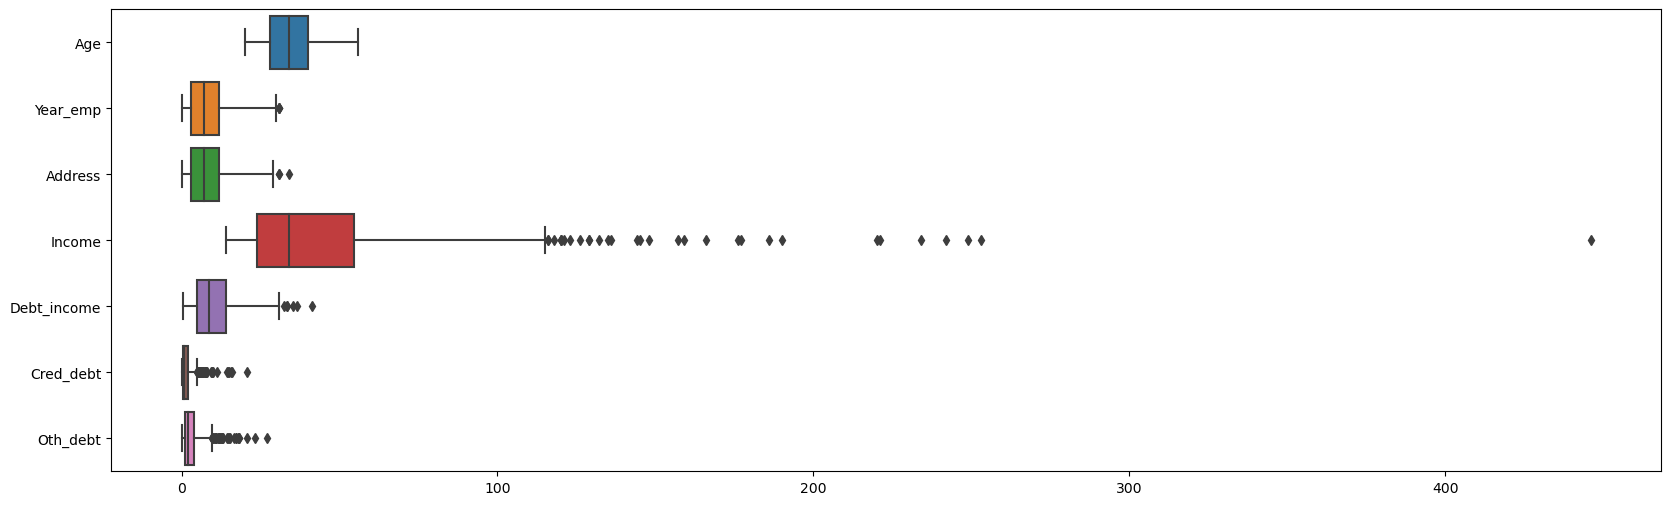

In [12]:
#Creating Boxplots
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=df_new, orient= "h", whis=2)

In [14]:
#Changing the outlier criteria
feature_names = ['Year_emp','Address','Income',
                 'Debt_income','Cred_debt','Oth_debt']
Q1=[]
Q3=[]
IQR=[]
#Calculate Q1, Q3 and IQR for each feature:
for i, j in enumerate(feature_names):
    Q1.append(df_new[j].quantile(.25))
    Q3.append(df_new[j].quantile(.75))
    IQR.append(Q3[i]-Q1[i])
# Drop outliers:
for i, j in enumerate(feature_names):
    true_index = (df_new[j] >= (Q1[i] - 2 * IQR[i])) &
                 (df_new[j] <=(Q3[i] + 2 * IQR[i]))
    df_new = df_new.loc[true_index] 

SyntaxError: invalid syntax (738556588.py, line 14)

In [15]:
import pandas as pd
df = pd.read_csv('Iris.data',header= None, 
                  names=['sepal_length', 'sepal_width',
                  'petal_length','petal_width', 'plant_class'])

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,plant_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


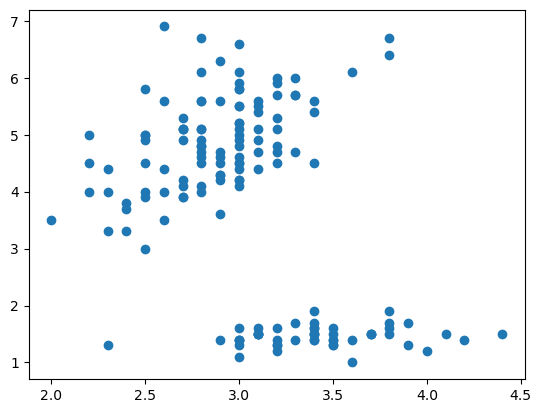

In [17]:
#Scatterplot
import matplotlib.pyplot as plt
plt.scatter(df.sepal_width,df.petal_length)

In [18]:
#Importing the Sickit Learn library and then using the DBSCAN model to cluster the dataset
from sklearn.cluster import DBSCAN
data_without_label= df[['sepal_length', 'sepal_width', 
                        'petal_length','petal_width']]
model = DBSCAN(eps = .55, min_samples = 10).fit(data_without_label)

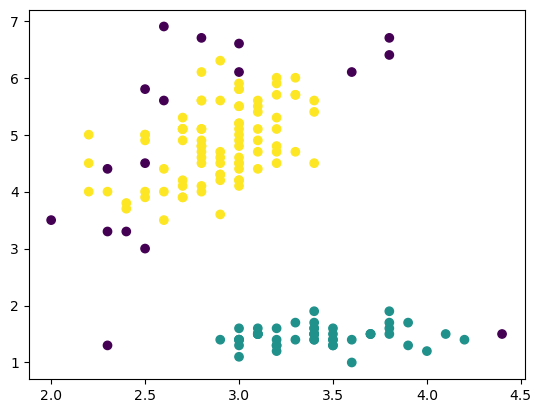

In [19]:
colors = model.labels_
plt.scatter(df["sepal_width"], df["petal_length"], c = colors)

In [20]:
#Dropping outliers
import numpy as np
np.unique(model.labels_, return_counts=True) 
#>>(array([-1,  0,  1], dtype=int64), array([17, 48, 85], dtype=int64))
# Cluster -1 has 17 members which is the minimum number in cluster's members
# This shows that the class =-1 is the ouliers class
outliers_detecting = df[model.labels_ == -1]
outliers_index_list= outliers_detecting.index.tolist()
outliers_index_list
# droping outliers and save new dattaset in df_new
df_new= df.drop(labels= outliers_index_list)
df_new

,sepal_length,sepal_width,petal_length,petal_width,plant_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
import pandas as pd
df = pd.read_csv("Titanic.csv")
df.shape

(1309, 13)

In [22]:
#Missing data analyses
df.isnull().sum()

survival       0
class          0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
boat         823
body        1188
dtype: int64

In [23]:
# Compute the percent of missing values in each feature:
round(df.isnull().sum()/1309, ndigits=2)

survival    0.00
class       0.00
name        0.00
sex         0.00
age         0.20
sibsp       0.00
parch       0.00
ticket      0.00
fare        0.00
cabin       0.77
embarked    0.00
boat        0.63
body        0.91
dtype: float64

In [24]:
#Removing missing values from 'fare' and 'embarked'
df.dropna(subset=['fare', 'embarked'], inplace= True)

In [28]:
#Removing missing values from 'cabin', 'boat', and 'body'
df.dropna(subset=['cabin','boat','body'],inplace=True)
df.shape

(0, 13)

In [29]:
df.fillna(value={'age':df.age.mean()}, inplace= True, axis=0)

In [33]:
df = pd.read_csv('Titanic.csv')

In [44]:
#KNN imputation
# Import library and the model:
from sklearn.impute import KNNImputer
# Identify the features involved in learning the algorithm:
features= ['survival', 'class','sex','age','sibsp','parch','fare','embarked']

In [45]:
#Encoding sex and embarked features:
df["embarked"] = df["embarked"].astype('category')
df["sex"] = df["sex"].astype('category')
df["embarked"] = df["embarked"].cat.codes
df["sex"] = df["sex"].cat.codes

In [46]:
# Employ model:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df[features])

In [47]:
#Apply imputation in the DataFrame and save it in df_imputed variable:
df_imputed = pd.DataFrame(imputed, columns=features)
# Check df_imputed for missing values:
df_imputed.isnull().sum()

survival    0
class       0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [48]:
#One hot encoding
url = "https://raw.githubusercontent.com/SarangPratap/Dataset/master/Encoding%20Data.csv"
df1 = pd.read_csv(url)
df1.head(10)

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


In [49]:
#Encoding binary features
df1['bin_1'] = df1['bin_1'].apply(lambda x: 1 if x == 'T' else 0)
df1['bin_2'] = df1['bin_2'].apply(lambda x: 1 if x == 'Y' else 0)
df1.head(10)

,id,bin_1,bin_2,nom_0,ord_2
0,0,0,0,Red,Hot
1,1,0,1,Blue,Warm
2,2,0,0,Blue,Cold
3,3,0,0,Green,Warm
4,4,1,0,Red,Cold
5,5,1,0,Green,Hot
6,6,0,0,Red,Cold
7,7,1,0,Red,Cold
8,8,0,0,Blue,Warm
9,9,0,1,Red,Hot


In [50]:
#Encoding ordinal features
df1["ord_2"] = df1["ord_2"].astype('category')
df1["ord_2"] = df1["ord_2"].cat.codes

In [51]:
df1.head()

,id,bin_1,bin_2,nom_0,ord_2
0,0,0,0,Red,1
1,1,0,1,Blue,2
2,2,0,0,Blue,0
3,3,0,0,Green,2
4,4,1,0,Red,0


In [1]:
#Feature Scaling: Normalization
# Import dataset to the workspace:
from sklearn.datasets import load_wine

In [5]:
#Save dataset in wine_dataset variable:
wine_dataset = load_wine()
wine_dataset
#Save features of the wine_dataset in features variable:
features = wine_dataset.feature_names
#Print the description of the dataset:
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
#Converting the dataset as a Pandas DataFrame
import pandas as pd
df= pd.DataFrame(data= wine_dataset.data,columns= features)
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
#Normalization of the data
from sklearn.preprocessing import MinMaxScaler
min_max_normaliz= MinMaxScaler(feature_range=(0,1))
minmax_arr = min_max_normaliz.fit_transform(df)
df_minmax = pd.DataFrame(data= minmax_arr,columns= features)
df_minmax.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Feature Standardization
from sklearn.preprocessing import StandardScaler
std_scale= StandardScaler()
std_arr = std_scale.fit_transform(df)
df_std = pd.DataFrame(data= std_arr,columns= features)
df_std.describe()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


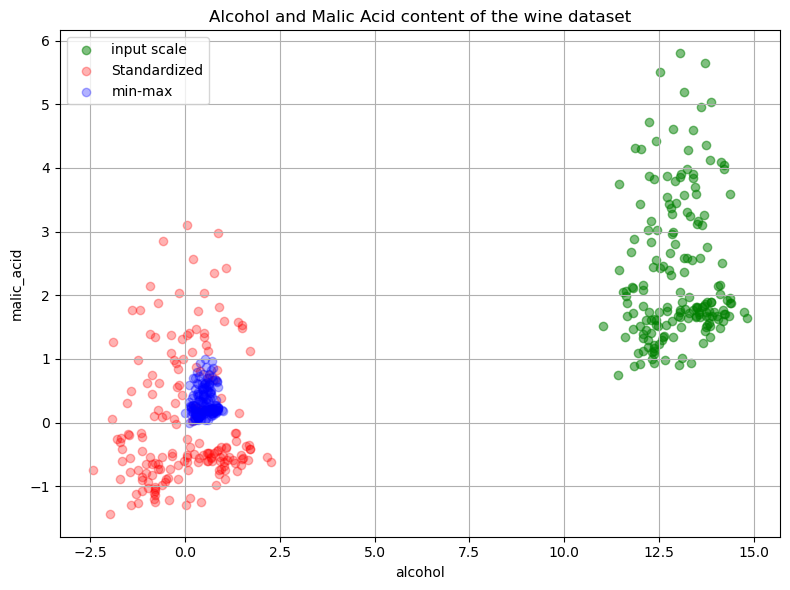

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(df['alcohol'], df['malic_acid'],
            color='green', label='input scale', alpha=0.5)

plt.scatter(df_std['alcohol'], df_std['malic_acid'], color='red',
            label='Standardized', alpha=0.3)

plt.scatter(df_minmax['alcohol'], df_minmax['malic_acid'],
            color='blue', label='min-max', alpha=0.3)

plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()

plt.show()
